<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/%E4%BD%9C%E6%A5%AD%E4%BA%94_%E8%AC%9D%E5%9D%A4%E9%81%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 讀入深度學習套件

In [20]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

### 2. 讀入數據

In [21]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [22]:
len(x_train)

25000

In [23]:
len(x_test)

25000

In [24]:
len(x_train[0])

218

In [25]:
len(x_train[1])

189

In [26]:
y_train[0]

1

In [27]:
y_train[1]

0

### 3. 資料處理

In [28]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

### 4. step 01: 打造一個函數學習機

In [29]:
model = Sequential()

### 模仿 CNN Dataset 縮小維度

In [30]:
model.add(Embedding(10000, 224))

### 取消 Dropout, 並減少 LSTM 數量 128-->64

In [31]:
model.add(LSTM(64))

In [32]:
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 224)         2240000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                73984     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,314,049
Trainable params: 2,314,049
Non-trainable params: 0
_________________________________________________________________


### 5. step 02: 訓練

## 減少至 5 epochs

In [35]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5,
         validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 31s 34ms/step - loss: 0.4100 - accuracy: 0.8108 - val_loss: 0.3441 - val_accuracy: 0.8499
Epoch 2/5
782/782 [==============================] - 26s 33ms/step - loss: 0.2546 - accuracy: 0.8993 - val_loss: 0.3564 - val_accuracy: 0.8497
Epoch 3/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1697 - accuracy: 0.9347 - val_loss: 0.4005 - val_accuracy: 0.8488
Epoch 4/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1249 - accuracy: 0.9555 - val_loss: 0.4384 - val_accuracy: 0.8409
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.0949 - accuracy: 0.9666 - val_loss: 0.5053 - val_accuracy: 0.8345


### 減少參數量後, 訓練時間原為: 512s/epoch 變為: 26s/epoch
### 準確度(Accuracy) 在訓練 3epoch之後增加緩慢, 
### 雖然持續訓練到 10 epochs之後 trainning accuracy 會達到 0.98
### 但是 val_accuracy 停留在 0.83
### 所以此模型架構無法依調參數改善過擬合情形 

In [36]:
history_dict = history.history

<built-in method keys of dict object at 0x7fc952fb9050>


### 換個存檔方式

這次是把 model 和訓練權重分開存, 使用上更有彈性。

In [37]:
model_json = model.to_json()
open('new_imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('new_imdb_model_weights.h5')

In [42]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

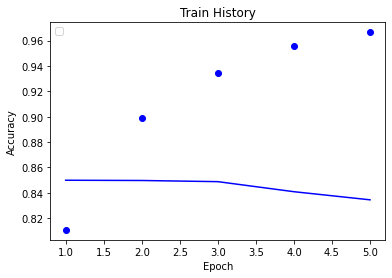

In [44]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.clf()
plt.gcf()
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

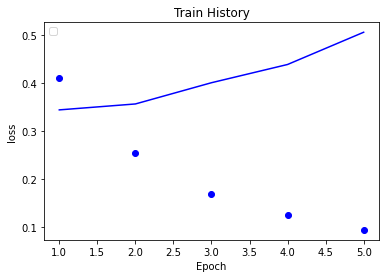

In [45]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.clf()
plt.gcf()
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')